In [5]:
import numpy as np
import pandas as pd

# Обработка естественного языка

Где используется:

- Анализ соц.сетей
- Голосовые помощники, чат-боты
- Веб-поиск
- Машинный перевод
- Анализ тематики текста

## Работаем со строками

По строкам можно индексироваться как и по спискам

In [2]:
sentence = "Роза упала на лапу Азора"
sentence[::-1]

'арозА упал ан алапу азоР'

Строки можно разбивать на слова

In [3]:
sentence.split()

['Роза', 'упала', 'на', 'лапу', 'Азора']

Массивы строк можно соединять

In [4]:
"/".join(sentence.split())

'Роза/упала/на/лапу/Азора'

Можно менять регистр

In [5]:
sentence.lower(), sentence.upper()

('роза упала на лапу азора', 'РОЗА УПАЛА НА ЛАПУ АЗОРА')

Проверять на числа

In [6]:
sentence.isnumeric(), sentence.isalpha() 

(False, False)

Можно делать замены

In [7]:
sentence.replace('Роза', 'не роза')

'не роза упала на лапу Азора'

Есть специальные символы, которые записываются через `\` и позволяют сделать перенос строки, табуляцию и многое другое

In [8]:
print('первая строка\nвторая строка') # перенос строки
print('до\tпосле') # табуляция
print('Пишем кавычки: \', \"')
print('Пишем обратный слэш: \\')

первая строка
вторая строка
до	после
Пишем кавычки: ', "
Пишем обратный слэш: \


Также существуют регулярные выражения, с помощью которых можно сделать практически что угодно с любым набором символов.

Ниже пример проверки на валидность адреса электронной почты. 

В реальном приложении лучше не использовать такую проверку.

In [12]:
import re
regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

# Don't use it in prod
def check(email):
    if(re.fullmatch(regex, email)):
        print("Valid Email") 
    else:
        print("Invalid Email")
        
check('valid_email@mail.ru')
check('invalid email')
check('invalid_email@mail.21')

Valid Email
Invalid Email
Invalid Email


## Задача

Предобработать текст следующим способом:

- разбить текст на слова
- привести все к нижнему регистру
- убрать из текста все точки, запятые и скобки

Найти в тексте самое частовстречаемое слово.

In [10]:
text = "Разобьем этот текст на слова, приведем к нижнему регистру. Затем уберем пунктуацию (точки, запятые и скобки). А потом найдем слово, которое встречается чаще всего. текст текст текст."

# Ваш код здесь


## Bag of word

Чтобы применять к тексту методы машинного обучения, его необходимо векторизовать (превратить в массив чисел). Это можно сделать разными способами. Самый простой способ - bag of word.

Разбиваем весь текст на токены (слова). Затем формируем матрицу, в которой в строках храним предложения, а в колонках слова. За каждое вхождение слова в предложение добавляем 1 в соответствующую ячейку. Не забываем убрать знаки препинания, табуляцию, пробелы и знаки переноса строки.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]

bow = CountVectorizer()
bow_result = bow.fit_transform(corpus).toarray()
pd.DataFrame(bow_result, columns=bow.get_feature_names(), index=corpus)

,and,document,first,is,one,second,the,third,this
This is the first document.,0,1,1,1,0,0,1,0,1
This is the second second document.,0,1,0,1,0,2,1,0,1
And the third one.,1,0,0,0,1,0,1,1,0
Is this the first document?,0,1,1,1,0,0,1,0,1


С русским текстом это будет работать не очень хорошо

In [15]:
corpus = [
    'Это первый документ.',
    'Это второй документ среди всех документов.',
    'А вот и третий.',
    'Вот и кончились документы.',
]

bow = CountVectorizer()
bow_result = bow.fit_transform(corpus).toarray()
pd.DataFrame(bow_result, columns=bow.get_feature_names(), index=corpus)

,вот,всех,второй,документ,документов,документы,кончились,первый,среди,третий,это
Это первый документ.,0,0,0,1,0,0,0,1,0,0,1
Это второй документ среди всех документов.,0,1,1,1,1,0,0,0,1,0,1
А вот и третий.,1,0,0,0,0,0,0,0,0,1,0
Вот и кончились документы.,1,0,0,0,0,1,1,0,0,0,0


"документ", "документов", "документы" - это все об одном, но колонки получились разные. Что делать с этим?

Применить стемминг!

## Стемминг

Стемминг - процесс извлечения основы слова, потому что зачастую форма слова не влияет на смысл.

В классе будем использовать довольно простой стеммер Портера. На практике лучше использовать библиотеку `nltk` для русского текста.

In [14]:
# Взято отсюда: https://gist.github.com/Kein1945/9111512
import re

class Porter:
	PERFECTIVEGROUND =  re.compile(u"((ив|ивши|ившись|ыв|ывши|ывшись)|((?<=[ая])(в|вши|вшись)))$")
	REFLEXIVE = re.compile(u"(с[яь])$")
	ADJECTIVE = re.compile(u"(ее|ие|ые|ое|ими|ыми|ей|ий|ый|ой|ем|им|ым|ом|его|ого|ему|ому|их|ых|ую|юю|ая|яя|ою|ею)$")
	PARTICIPLE = re.compile(u"((ивш|ывш|ующ)|((?<=[ая])(ем|нн|вш|ющ|щ)))$")
	VERB = re.compile(u"((ила|ыла|ена|ейте|уйте|ите|или|ыли|ей|уй|ил|ыл|им|ым|ен|ило|ыло|ено|ят|ует|уют|ит|ыт|ены|ить|ыть|ишь|ую|ю)|((?<=[ая])(ла|на|ете|йте|ли|й|л|ем|н|ло|но|ет|ют|ны|ть|ешь|нно)))$")
	NOUN = re.compile(u"(а|ев|ов|ие|ье|е|иями|ями|ами|еи|ии|и|ией|ей|ой|ий|й|иям|ям|ием|ем|ам|ом|о|у|ах|иях|ях|ы|ь|ию|ью|ю|ия|ья|я)$")
	RVRE = re.compile(u"^(.*?[аеиоуыэюя])(.*)$")
	DERIVATIONAL = re.compile(u".*[^аеиоуыэюя]+[аеиоуыэюя].*ость?$")
	DER = re.compile(u"ость?$")
	SUPERLATIVE = re.compile(u"(ейше|ейш)$")
	I = re.compile(u"и$")
	P = re.compile(u"ь$")
	NN = re.compile(u"нн$")

	def stem(word):
		word = word.lower()
		word = word.replace(u'ё', u'е')
		m = re.match(Porter.RVRE, word)
		if m and m.groups():
			pre = m.group(1)
			rv = m.group(2)
			temp = Porter.PERFECTIVEGROUND.sub('', rv, 1)
			if temp == rv:
				rv = Porter.REFLEXIVE.sub('', rv, 1)
				temp = Porter.ADJECTIVE.sub('', rv, 1)
				if temp != rv:
					rv = temp
					rv = Porter.PARTICIPLE.sub('', rv, 1)
				else:
					temp = Porter.VERB.sub('', rv, 1)
					if temp == rv:
						rv = Porter.NOUN.sub('', rv, 1)
					else:
						rv = temp
			else:
				rv = temp
			
			rv = Porter.I.sub('', rv, 1)

			if re.match(Porter.DERIVATIONAL, rv):
				rv = Porter.DER.sub('', rv, 1)

			temp = Porter.P.sub('', rv, 1)
			if temp == rv:
				rv = Porter.SUPERLATIVE.sub('', rv, 1)
				rv = Porter.NN.sub(u'н', rv, 1)
			else:
				rv = temp
			word = pre+rv
		return word
	stem=staticmethod(stem)

In [17]:
Porter.stem('документа'), Porter.stem('документы'), Porter.stem('документов')

('документ', 'документ', 'документ')

In [18]:
def preprocess_word(word):
    return Porter.stem(word.replace('.', ''))

In [19]:
stemmed_corpus = [' '.join(map(preprocess_word, text.split())) for text in corpus]
stemmed_corpus

['эт перв документ',
 'эт втор документ сред всех документ',
 'а вот и трет',
 'вот и конч документ']

Вынесем в отдельную функцию, она нам дальше понадобится

In [20]:
def preprocess_corpus(corpus):
    return [' '.join(map(preprocess_word, text.split())) for text in corpus]

Запустим Bag of word на новом корпусе

In [22]:
bow = CountVectorizer()
bow_result = bow.fit_transform(stemmed_corpus).toarray()
pd.DataFrame(bow_result, columns=bow.get_feature_names(), index=stemmed_corpus)

,вот,всех,втор,документ,конч,перв,сред,трет,эт
эт перв документ,0,0,0,1,0,1,0,0,1
эт втор документ сред всех документ,0,1,1,2,0,0,1,0,1
а вот и трет,1,0,0,0,0,0,0,1,0
вот и конч документ,1,0,0,1,1,0,0,0,0


Если хотим подставить исходные предложения, передаем другое значение в index

In [24]:
pd.DataFrame(bow_result, columns=bow.get_feature_names(), index=corpus)

,вот,всех,втор,документ,конч,перв,сред,трет,эт
Это первый документ.,0,0,0,1,0,1,0,0,1
Это второй документ среди всех документов.,0,1,1,2,0,0,1,0,1
А вот и третий.,1,0,0,0,0,0,0,1,0
Вот и кончились документы.,1,0,0,1,1,0,0,0,0


## Попробуем взять документ побольше

Сначала распакуем архив

In [2]:
import gzip

In [8]:
archive_path = '../data/news.txt.gz'
file_path = '../data/news.txt'

with gzip.open(archive_path, 'rb') as arch:
    content = arch.read()
    
with open(file_path, 'wb') as file:
    file.write(content)

In [9]:
df = pd.read_csv('../data/news.txt', sep='\t', header=None)
df.columns = ['label', 'title', 'text']
df.head()

,label,title,text
0,style,Rolex наградит победителей регаты,Парусная гонка Giraglia Rolex Cup пройдет в Ср...
1,sport,Матс Сундин стал советником тренера сборной Шв...,Шведский хоккеист Матс Сундин назначен советни...
2,media,Брендом года по версии EFFIE впервые стал город,"Гран-при конкурса ""Брэнд года/EFFIE"" получил г..."
3,economics,Цена нефти WTI снизилась после публикации данн...,Цена американской нефти WTI на лондонской бирж...
4,economics,Сбербанк распродаст другим банкирам миллиардны...,"Сбербанк выставил на продажу долги по 21,4 тыс..."


<AxesSubplot:>

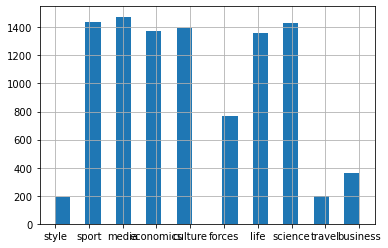

In [40]:
df.label.hist(bins=20)

## Задача

Применить стемминг к тексту и добавить колонку `text_stemmed`

In [42]:
# Ваш код здесь


## Задача

Спрогнозируем тему новости.

Выборку разделить на train и test, применить логистическую регрессию к датасету, чтобы классифицировать тему.

Для оценки качества использовать метрику accuracy. Вывести confusion matrix.

**Важно:** на вход логистической регрессии необходимо подавать матрицу из чисел, а не слова.

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [130]:
df['label'] = pd.Categorical(df['label'])
df['label_code'] = df.label.cat.codes

In [142]:
# Ваш код здесь


## TF-IDF

BOW - очень простой алгоритм, но даже он дает неплохой результат. Попробуем его улучшить. 

`TF-IDF` - формула, состоящая из двух частей **Term frequency - Inverce Document Frequency**

`TF` - какой процент указанного слова по отношению ко всем словам в документе

`IDF` - количество документов делим на количество документов, в которые входит данное слово

`TF-IDF` = `TF` * `IDF`

Класс `TfidfVectorizer` имеет такие же методы, как и `CountVectorizer`.

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Задача 

Применить TF-IDF к тому же датасету, сравнить качество с BOW

In [ ]:
# Ваш код здесь


## Пайплайны

Можно использовать сложные преобразования и легко сравнивать качество моделей, а также подбирать гиперпараметры, используя пайплайны

In [215]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [217]:
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", LogisticRegression()),
    ]
)

Для примера обучимся на всей выборке и попробуем что-то предсказать

In [218]:
pipeline.fit(df['text'], df['label_code'])

C:\Users\koval\anaconda3\envs\data-science-class\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [221]:
df['text'].iloc[:5]

0    Парусная гонка Giraglia Rolex Cup пройдет в Ср...
1    Шведский хоккеист Матс Сундин назначен советни...
2    Гран-при конкурса "Брэнд года/EFFIE" получил г...
3    Цена американской нефти WTI на лондонской бирж...
4    Сбербанк выставил на продажу долги по 21,4 тыс...
Name: text, dtype: object

In [222]:
df['label_code'].iloc[:5]

0    8
1    7
2    5
3    2
4    2
Name: label_code, dtype: int8

In [219]:
pipeline.predict(df['text'].iloc[:5])

array([8, 7, 5, 2, 2], dtype=int8)

Подробнее можно посмотреть [тут](https://www.kaggle.com/sermakarevich/sklearn-pipelines-tutorial)

Мы вернемся к пайплайнам через несколько занятий и рассмотрим инструменты, которые дают большую гибкость, чем sklearn

## Задача

Попробовать случайный лес для классификации документов. Использовать пайплайны для решения.

Выборку необходимо как и раньше делить на треин и тест.

In [ ]:
# Ваш код здесь


## Лемматизаторы

Лемматизация - поиск начальной формы слова.

Используя лемматизаторы можно более точно различать слова, но работают они медленнее, чем стемммеры

In [ ]:
! pip install pymorphy2

In [25]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

morph_res = morph.parse('случайности')
morph_res[0].normal_form


'случайность'

## Задача

Применить лемматизацию перед TF-IDF. Решить задачу классификации.

## Word2Vec

Все предыдущие методы позволяли посмотреть частоту вхождения слова, но при этом не учитывали смысл слова и похожесть слов.

Метод word2vec пытается понять смысл слов.

![](../images/word2vec.png)

In [10]:
def process_sentences(df):
    """
    Разбиваем на слова, убираем пунктуацию и применяем стемминг
    """
    processed_texts = []
    for i, text in enumerate(df['text']):
        if i % 500 == 0:
            print(i) # Отмечаем прогресс
        text = text.lower()
        words = re.findall(r'\b\w+\b', text) # Убираем пунктуацию, разбиваем на слова
        tokens = [Porter.stem(word) for word in words] # Применяем стемминг
        processed_texts.append(tokens)
    return processed_texts

In [20]:
processed_texts = process_sentences(df)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [21]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=processed_texts)

In [22]:
model.train(processed_texts, total_examples=len(processed_texts), epochs=30)

(49300205, 58933440)

In [23]:
word = 'хоккей'
stemmed_word = Porter.stem(word)
model.wv.most_similar(stemmed_word, topn=10)

[('биатлон', 0.6496457457542419),
 ('теннис', 0.6235681772232056),
 ('футбол', 0.600563645362854),
 ('баскетбол', 0.5875694155693054),
 ('фигурн', 0.551959216594696),
 ('триатлон', 0.5348076224327087),
 ('волейбол', 0.5223391652107239),
 ('фехтован', 0.5153805017471313),
 ('чемпионк', 0.5122454762458801),
 ('катан', 0.501915693283081)]

In [24]:
def get_v(word):
    return model.wv[Porter.stem(word)]

model.wv.similar_by_vector(get_v('полиция') + get_v('мужчина'))

[('полиц', 0.8942763209342957),
 ('полицейск', 0.8309827446937561),
 ('мужчин', 0.8248519897460938),
 ('милиц', 0.7188462018966675),
 ('пенсионерк', 0.699247419834137),
 ('преступник', 0.691802442073822),
 ('охранник', 0.6899130344390869),
 ('спасател', 0.6889834403991699),
 ('грабител', 0.6472103595733643),
 ('злоумышленник', 0.631364107131958)]

## Задача

Используя word2vec классифицировать тексты

Алгоритм:

- разделить на треин и тест выборки
- обучить word2vec на треин выборке
- написать функцию для составления вектора по документу (для этого нужно посчитать среднее векторов всех слов)
- обучить модель, оценить результаты

Для начала лучше взять небольшую выборку, чтобы проще было писать код (например, 2000 в треин и 5 примеров в тест). 

Когда убедились, что все работает, брать весь датасет.

Функции, которые могут помочь и подсказки:

- `model.wv.key_to_index` - словарь токен->номер токена. Можно взять список всех слов отсюда.
- `model.wv[word]` - получаем вектор по слову. Не забываем применить предобработку!
- может случиться так, что word2vec не будет знать какого-то слова из обучающей выборки. Тогда этому слову присваиваем нулевой вектор.

# Домашняя работа

Будем решать задачу сентимент-анализа. В архиве `data/sentiment analisys.zip` лежит несколько эксель файлов с твитами разных пользователей на разных языках (один файл - один язык).

Нужно выбрать один из файлов и провести над ним работу.

## Easy

Оценить сбалансированность классов.

Удалить пунктуацию из датасета.

Преобразовать датасет в BOW или TF-IDF, поделить на треин-тест и спрогнозировать вашей любимой моделью

## Normal

Удалить стоп-слова из датасета, использовать стеммер Портера (лежит в `src/porter.py`). Использовать пайплайн для TF-IDF и модели машинного обучения. Подобрать параметры. Сравнить качество нескольких моделей.

## Hard

Использовать лемматизатор `pymorphy` вместо стемминга. Использовать word2vec вместо tf-idf. В качестве модели использовать градиентный бустинг не из sklearn. Подобрать параметры, оценить качество на кросс-валидации.